### Константин, приветствую!

Первые итерации не выкладываю на гит, а согласовываю с вами.   
Все изменения в исходном ноутбуке собираю в лог с указанием даты.

Я поменял путь к исходным данным для прогона работы на локальной машине. Когда будете запускать ноутбук у себя, переведите [эту ячейку](#Konstantin) в код, а ячейку ниже в маркдаун. 

[QA section](#qa) - текущие вопросы и ответы Константина.

## Table of content  

[Changelog](#changelog)  
[QA section](#qa)    

[Вводные данные](#intro)  
[Executive summary](#exsum)  

1. [Загрузка данных и первичный анализ](#import)  
2. [Исследовательский анализ данных](#eda)   
   2.1 [Анализ сезонность через декомпозицию](#seasons)   
   2.2 [Графики значимых переменных](#plots_01)  
3. [Кластеризация и поиск аномалий](#clusters)  
   3.1 [Три кластера](#triple)  
   3.2 [Поиск оптимального количество кластеров](#optimal)    
   3.3 [Семь кластеров](#seventh)  
4. [Анализ трех столбцов: температура, тяжение, СКО датчика](#triple_analysys)  
---

## Changelog <a class='anchor' id='changelog'></a>  

---

**26.08.20**  

Библиотеки собраны в одном месте в начале ноутбука;  
[Вопрос по сплиту датасета на зимнюю подвыборку](#split_question);  
[Приближение недельных выбросов Fbend_std](#0001);   
[Кластеризация и поиск аномалий](#0002);  
[Вопрос кластеризации](#question);  
[Первичный поиск кластеров по "локтю"](#clusters).  

**27.08.20**

Анализ семи кластеров первичного датасета;   
Добавлен полный анализ первичного датасета по трем столбцам;  
Добавлено оглавление, обновлена структура проекта;  
Добавлена секция текущих вопросов/ответов/решений;  
Решены первичные вопросы;  
Переделаны графики популяции кластеров. Теперь они интерактивные и на plotly.go;  
Обновлены графики поиска количества кластеров;  
Некоторые ячейки с долгими вычислениями переведены в маркдаун для ускорения перезапуска ноутбука;  


---

## QA section <a class='anchor' id='qa'></a>  

Здесь собираю текущие задачи и вопросы. Все компактно и в одном месте.

---

####  Кластеризация

*Вопрос*  
Насколько разумно нам делать классификацию неподготовленных данных?

*Ответ*  
Вопрос требует дальнейшего изучения. Ожидается, что на показания датчиков влияет температура воздуха и ещё ветер. Нагрузка токовая не должна влиять, по идее, так как все датчики стоят на грозотросах (пояснение Заказчика)
Предлагаю посмотреть как разобьются данные на 7 кластеров и нет ли корреляции лейблов кластеров с температурой. Полезно было бы сепарировать режимы работы датчиков в реальных условиях, как мне кажется

*Решение*   
Кластеризация по 7 кластерам, проверить лейблы, оставить только: температура, тяжение (ветер), СКО датчика

---

#### Аномалии

*Решение*  
Пока не трогаем аномальные выбросы. 

---

#### Размер выборки 

*Решение*   
Пока оставляем 6000 строк. Дополнительный датасет по зимнему периоду уже подготовлен в работе.

---

## Вводные данные <a class='anchor' id='intro'></a>  

Данные работы системы ОАИСКГ на ПС XXXXX 			
			
Описание системы			
	ОАИСКГ - система контроля гололеда на проводах ВЛ. Состоит из оптических датчиков тяжения и температуры, оптического волокна, интеррогатора (оптический регистрирующий блок) и ПО для получения измерений		
	Датчики установлены распределенно - на расстоянии до несколько десятков км друг от друга.		
	Исходная частота получения данных - 10Гц, для выдачи на сервер системы они усредняются с периодом 10сек.		
			
Описание данных			
	Данные интегрированы в блоки по 10 минут. Каждый блок (строка таблицы) начинается с времени начала блока (время местное)		
	Далее следуют пакеты измерений от каждого датчика. В пакете следующие данные		
		N - количество исходных измерений в пакете	
		T - средняя температура датчика, ˚С	
		T_std - СКО температуры датчика, ˚С	
		Fav - среднее тяжение, Н	
		Fav_std - СКО тяжения, Н	
		Fbend - средний изгиб датчика, Н	
		Fbend_std - СКО изгиба датчика, Н	
		Ice - эквивалентный гололед, мм	
		Ice_std - СКО эквивалентного гололеда, мм	
		Fnorm_min - минимальное нормальное тяжение в пролете, Н	
		Fnorm_max - максимальное нормальное тяжение в пролете, Н	
			нормальное тяжение определяется по текущей модели пролета, зависит от температуры


Анализ данных (вторая редакция, без секретов)

Конаков К.Г.

2020 08 20

## Executive Summary <a class='anchor' id='exsum'></a>  

* Проведена загрузка 17 тысяч записей с датчиков с 10 датчиков, 110 колонок с данными
* Для первичного изучения отброшены данные, где в интервале 10 минут есть пропуски записей
* В работе применен метод декомпозиции временных рядов. Выделен тренд и сезонная (недельная)составляющая
* Особое внимание обращено на выброс Fbend_std. Показано, что это выброс происходит практически одновременно на трех датчиках
* В плане:  
* Стадия A)корреляционный анализ, elbow, кластеризация по первому датчику
* ревью КК
* Стадия Б) после подтверждения аналогичный анализ по остальным датчикам
* сдача результата Заказчику
* Возможно продолжение работы в двух направлениях:
    * А) изучение и интерпретация выбросов других параметров. Возможно, на сырых, не усредненных данных.
    * Б) формирование признаков и тренировка модели, которая уменьшит число "ложных тревог". То есть система покажет жёлтый свет, если гололед начал образовываться, но вероятнее всего сам растает

## 1. Загрузка данных <a class='anchor' id='import'></a> 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
#%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('F:\Работа\_IT\konakov_sensors\TOG20_1_10min_headers.xlsx', header = 2, index_col=0)

#### Переведите ячейку в код, а ячейку выше в маркдаун  <a class='anchor' id='Konstantin'></a>

#### *кнопки 'y' и 'm', соответственно*

df = pd.read_excel('C:\___Konakov_work\TOG20_1_10min_headers.xlsx', header = 2, index_col=0)

In [3]:
df.head() # изучим начало датасета

N_Sensor12-11  T_Sensor12-11  T_std_Sensor12-11  \
DateTime                                                               
2020-01-01 00:00:00          100.0      -2.292167           0.006583   
2020-01-01 00:10:00          100.0      -2.267683           0.007567   
2020-01-01 00:20:00          100.0      -2.238517           0.006250   
2020-01-01 00:30:00          100.0      -2.204450           0.006767   
2020-01-01 00:40:00          100.0      -2.161767           0.006433   

                     Fav_Sensor12-11  Fav_std_Sensor12-11  Fbend_Sensor12-11  \
DateTime                                                                       
2020-01-01 00:00:00      8781.619650            15.540450          -5.726400   
2020-01-01 00:10:00      8775.583017            16.167100          -5.721750   
2020-01-01 00:20:00      8772.642833            14.954567          -5.723217   
2020-01-01 00:30:00      8772.006050            14.743733          -5.722717   
2020-01-01 00:40:00      8768.819700            15.115983          -5.717350   

                     Fbend_std_Sensor12-11  Ice_Sensor12-11  \
DateTime                                                      
2020-01-01 00:00:00               0.015850         1.029383   
2020-01-01 00:10:00               0.015800         1.020233   
2020-01-01 00:20:00               0.015883         1.017650   
2020-01-01 00:30:00               0.013733         1.020133   
2020-01-01 00:40:00               0.014950         1.018617   

                     Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  ...  \
DateTime                                                         ...   
2020-01-01 00:00:00             0.030083            7788.526550  ...   
2020-01-01 00:10:00             0.031200            7787.369067  ...   
2020-01-01 00:20:00             0.029050            7785.530467  ...   
2020-01-01 00:30:00             0.028517            7783.651267  ...   
2020-01-01 00:40:00             0.029283            7781.330650  ...   

                     T_Sensor12-20  T_std_Sensor12-20  Fav_Sensor12-20  \
DateTime                                                                 
2020-01-01 00:00:00      -2.010700           0.008600      5224.544817   
2020-01-01 00:10:00      -1.985900           0.008750      5227.373650   
2020-01-01 00:20:00      -1.942867           0.008617      5225.645767   
2020-01-01 00:30:00      -1.889117           0.008583      5225.028000   
2020-01-01 00:40:00      -1.839950           0.008533      5224.257550   

                     Fav_std_Sensor12-20  Fbend_Sensor12-20  \
DateTime                                                      
2020-01-01 00:00:00            19.855717          -0.151167   
2020-01-01 00:10:00            20.580400          -0.128617   
2020-01-01 00:20:00            20.491267          -0.114183   
2020-01-01 00:30:00            20.296617          -0.111317   
2020-01-01 00:40:00            20.592100          -0.114717   

                     Fbend_std_Sensor12-20  Ice_Sensor12-20  \
DateTime                                                      
2020-01-01 00:00:00               0.021833         0.201350   
2020-01-01 00:10:00               0.019967         0.209217   
2020-01-01 00:20:00               0.020600         0.207133   
2020-01-01 00:30:00               0.019850         0.208267   
2020-01-01 00:40:00               0.019500         0.208767   

                     Ice_std_Sensor12-20  Fnorm_min_Sensor12-20  \
DateTime                                                          
2020-01-01 00:00:00             0.046900            4707.054967   
2020-01-01 00:10:00             0.048517            4706.563467   
2020-01-01 00:20:00             0.048317            4705.689333   
2020-01-01 00:30:00             0.047717            4704.611600   
2020-01-01 00:40:00             0.048433            4703.629850   

                     Fnorm_max_Sensor12-20  
DateTime                                    
2020-01-01 00:00:00            5573.700783  


In [4]:
df.info() # общая информация о датасете и объеме занимаемой памяти

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16929 entries, 2020-01-01 00:00:00 to 2020-04-29 10:50:00
Columns: 110 entries, N_Sensor12-11 to Fnorm_max_Sensor12-20
dtypes: float64(110)
memory usage: 14.3 MB


In [5]:
if df.index.is_monotonic: # проверим на монотонность
    print('Данные монотонны')
else:
    print('Данные не монотонны, сортирую')
    df.sort_index(inplace=True)
    print(df.info())

Данные монотонны


In [6]:
df.columns #list of all columns

Index(['N_Sensor12-11', 'T_Sensor12-11', 'T_std_Sensor12-11',
       'Fav_Sensor12-11', 'Fav_std_Sensor12-11', 'Fbend_Sensor12-11',
       'Fbend_std_Sensor12-11', 'Ice_Sensor12-11', 'Ice_std_Sensor12-11',
       'Fnorm_min_Sensor12-11',
       ...
       'T_Sensor12-20', 'T_std_Sensor12-20', 'Fav_Sensor12-20',
       'Fav_std_Sensor12-20', 'Fbend_Sensor12-20', 'Fbend_std_Sensor12-20',
       'Ice_Sensor12-20', 'Ice_std_Sensor12-20', 'Fnorm_min_Sensor12-20',
       'Fnorm_max_Sensor12-20'],
      dtype='object', length=110)

In [7]:
first_sensor_column = [col for col in df.columns if 'Sensor12-11' in col] # выберем только столбцы от первого датчика

In [8]:
first_sensor_column # Изучим эти столбцы

['N_Sensor12-11',
 'T_Sensor12-11',
 'T_std_Sensor12-11',
 'Fav_Sensor12-11',
 'Fav_std_Sensor12-11',
 'Fbend_Sensor12-11',
 'Fbend_std_Sensor12-11',
 'Ice_Sensor12-11',
 'Ice_std_Sensor12-11',
 'Fnorm_min_Sensor12-11',
 'Fnorm_max_Sensor12-11']

In [9]:
df1 = df[first_sensor_column]# выберем только данные первого датчика 

In [10]:
# уберем интервалы с пропущенными записями
df1 = df1.drop(df1[(df1['N_Sensor12-11'] < 100) ].index)

In [11]:
df1s = df1.iloc[:6000,:].copy() # скопируем превую треть данных - зима

### <span style="color:green">Вопрос закрыт</span> <a class='anchor' id='split_question'></a>  
Босс, почему остановились на 6000 строк? Зима же не закончилась? Датафрем обрубается на дате 11 февраля.  
Я не менял значения. Если что - обновленный датасет в ячейке ниже.

In [12]:
#df1s = df1.iloc[:8611,:].copy()
#df1s

In [13]:
df1s.info() # checking that there are no empty cells

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 2020-01-01 00:00:00 to 2020-02-11 19:50:00
Data columns (total 11 columns):
N_Sensor12-11            6000 non-null float64
T_Sensor12-11            6000 non-null float64
T_std_Sensor12-11        6000 non-null float64
Fav_Sensor12-11          6000 non-null float64
Fav_std_Sensor12-11      6000 non-null float64
Fbend_Sensor12-11        6000 non-null float64
Fbend_std_Sensor12-11    6000 non-null float64
Ice_Sensor12-11          6000 non-null float64
Ice_std_Sensor12-11      6000 non-null float64
Fnorm_min_Sensor12-11    6000 non-null float64
Fnorm_max_Sensor12-11    6000 non-null float64
dtypes: float64(11)
memory usage: 562.5 KB


In [14]:
df1s.describe() #study percentiles

N_Sensor12-11  T_Sensor12-11  T_std_Sensor12-11  Fav_Sensor12-11  \
count    6000.000000    6000.000000        6000.000000      6000.000000   
mean      100.000842      -5.811072           0.013423      9407.572993   
std         0.003650       4.270418           0.097638       613.875484   
min       100.000000     -20.155150           0.005400      2138.157433   
25%       100.000000      -8.154975           0.006867      9013.689625   
50%       100.000000      -4.824542           0.007617      9225.897450   
75%       100.000000      -2.682979           0.008550      9642.631412   
max       100.016667       0.916367           4.528317     11618.491683   

       Fav_std_Sensor12-11  Fbend_Sensor12-11  Fbend_std_Sensor12-11  \
count          6000.000000        6000.000000            6000.000000   
mean             24.057464          -6.168562               0.028276   
std              64.444635           0.294913               0.055591   
min              11.323317          -7.634767               0.005750   
25%              14.432846          -6.318642               0.011200   
50%              16.481900          -6.092867               0.017942   
75%              21.820458          -5.991237               0.034054   
max            2723.970417          -1.719617               2.199933   

       Ice_Sensor12-11  Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  \
count      6000.000000          6000.000000            6000.000000   
mean          1.182860             0.039492            8324.718377   
std           1.050249             0.023026             316.797977   
min           0.169550             0.020783            7701.045183   
25%           0.582579             0.027650            8147.599271   
50%           0.797008             0.031600            8312.748317   
75%           1.400650             0.041750            8511.254967   
max           5.678267             0.251850            9212.978417   

       Fnorm_max_Sensor12-11  
count            6000.000000  
mean             9300.670126  
std               315.379378  
min              8678.178667  
25%              9124.646433  
50%              9289.541100  
75%              9486.422704  
max             10187.804400

## 2. Исследовательский анализ данных <a class='anchor' id='eda'></a>  

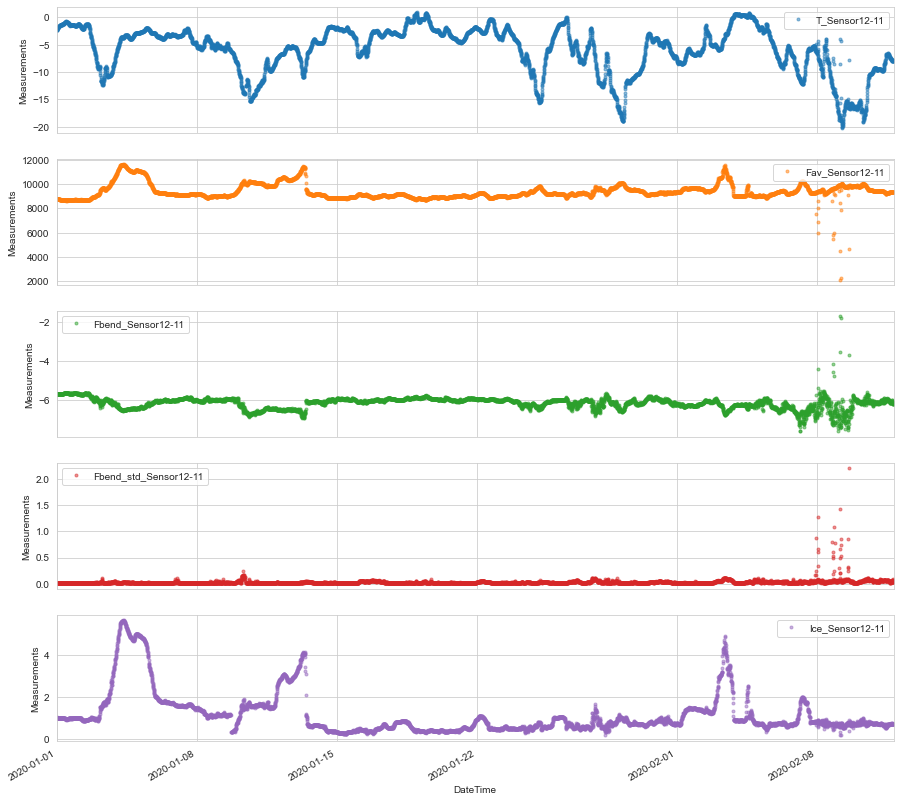

In [15]:
cols_plot = ['T_Sensor12-11','Fav_Sensor12-11','Fbend_Sensor12-11','Fbend_std_Sensor12-11','Ice_Sensor12-11']
axes = df1s[cols_plot].plot(
    marker='.', alpha=0.5, linestyle='None', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Measurements')

## 2.1 Анализ сезонности через декомпозицию  <a class='anchor' id='seasons'></a>  

In [16]:
def decomp_plot(temp):
    decomposed = seasonal_decompose(temp, period = 1000)

    plt.figure(figsize=(13, 8))
    plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')
    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Seasonality')
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuals')
    plt.tight_layout()

#### Температура датчика <a class='anchor' id='sensortemp'></a>  

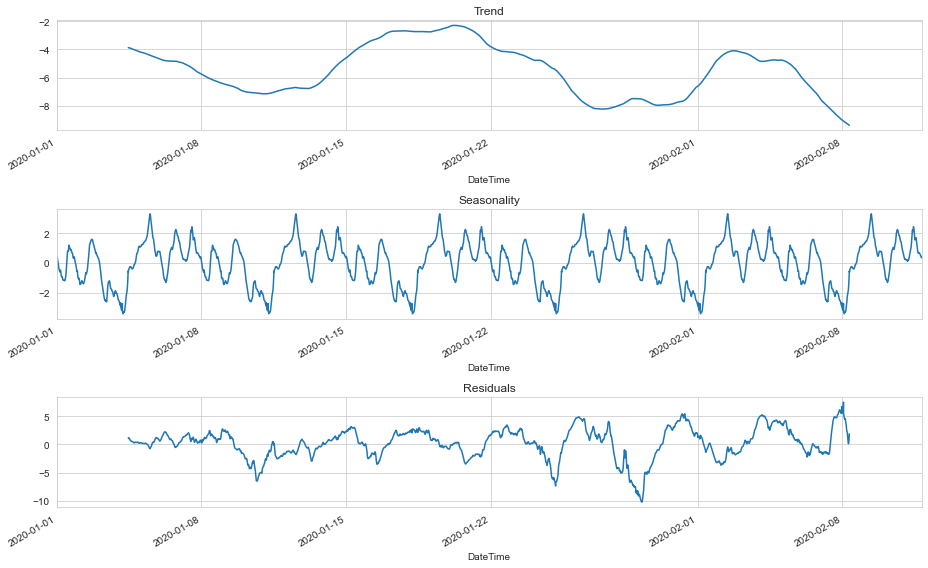

In [17]:
decomp_plot(df1s[['T_Sensor12-11']])

* "трендом" в данной ситуации является среднесуточная погода, её вклад от -8 до -2 градусов
* "сезонность" - это нагрев провода в зависимости от потребления тока - недельный цикл - даёт +/- 2 градуса
* отстатки выглядят стационарным времненным рядом, это влияние внешних факторов с размахом +/- 5 градусов

#### Fav - среднее тяжение, Н

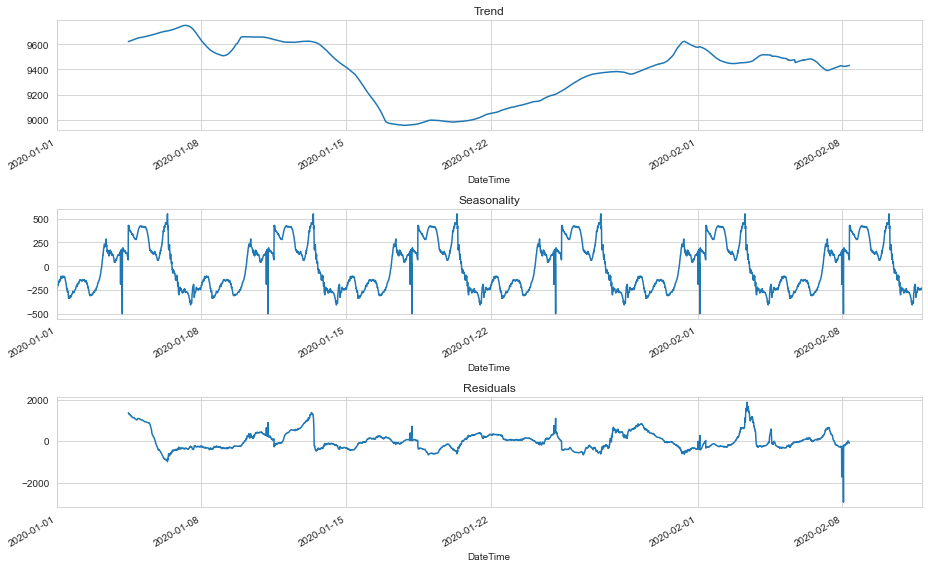

In [18]:
decomp_plot(df1s[['Fav_Sensor12-11']])

#### Fbend_std - СКО изгиба датчика, Н

разработчики датчиков особо заинтересованы в анализе этой характеристики

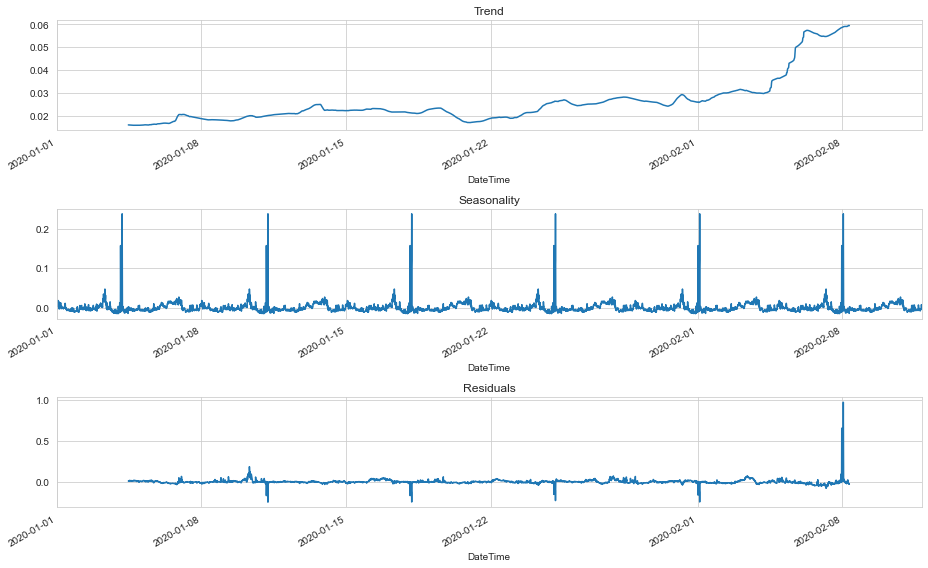

In [19]:
decomp_plot(df1s[['Fbend_std_Sensor12-11']])

* Интересно, что есть недельный цикл с заметной амплитудой. Зависимость от температуры?

#### Посмотрим на возможный недельный цикл вблизи.  <a class='anchor' id='0001'></a>

In [20]:
decomposed_weekly = seasonal_decompose(df1s[['Fbend_std_Sensor12-11']], period = 1000)

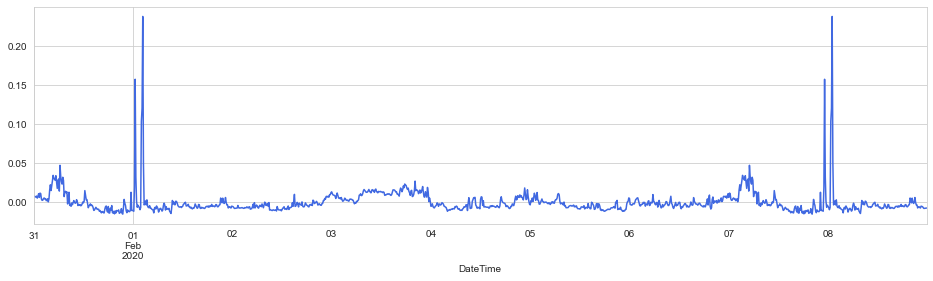

In [21]:
plt.figure(figsize=(16, 4))
decomposed_weekly.seasonal['2020-01-31':'2020-02-08'].plot(grid=True, c='royalblue');

Интересно, что выбросы происходят в ночь с пятницы на субботу.

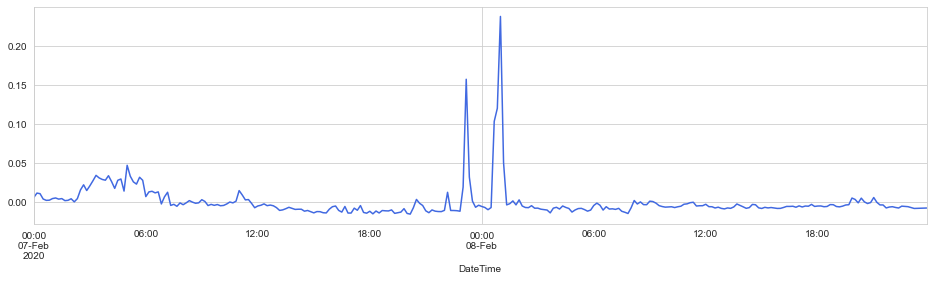

In [22]:
plt.figure(figsize=(16, 4))
decomposed_weekly.seasonal['2020-02-07':'2020-02-08'].plot(grid=True, c='royalblue');

И в районе полуночи.   

Это не похоже на стабильные недельне колебания температуры. Возможные причины уточним у инженеров.

#### Ice - эквивалентный гололед, мм

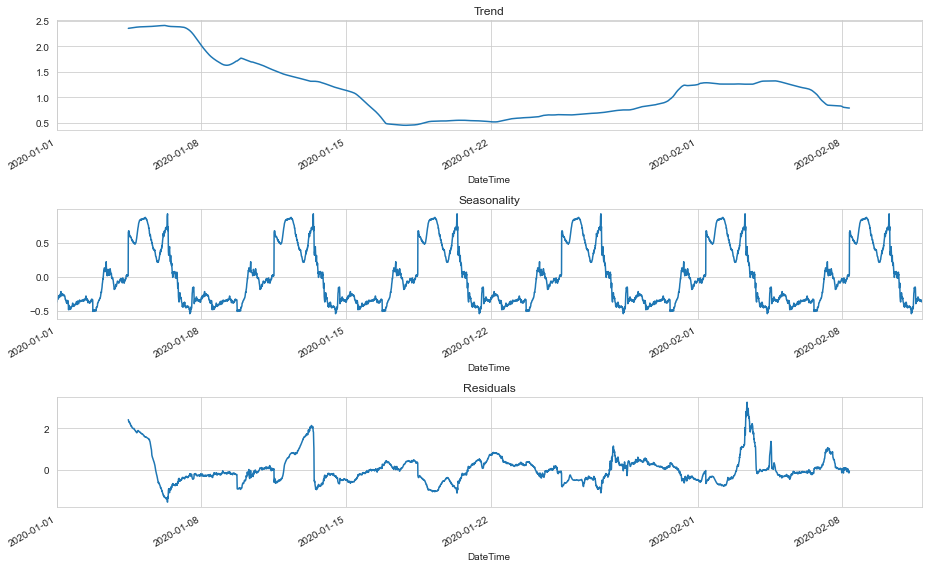

In [23]:
decomp_plot(df1s[['Ice_Sensor12-11']])

Разница всего в 1 мм, но в середине недели гололёду образоваться "труднее"

### 2.2 Графики значимых переменных  <a class='anchor' id='plots_01'></a> 

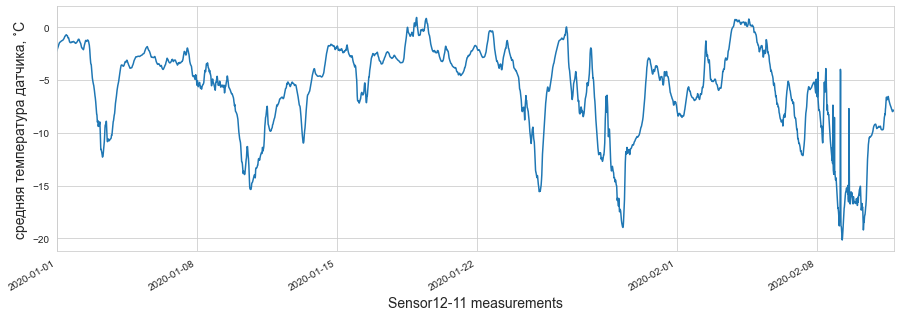

In [24]:
import matplotlib.pyplot as plt
df1s['T_Sensor12-11'].plot(figsize = (15,5),grid=True)
plt.xlabel('Sensor12-11 measurements',fontsize=14)
plt.ylabel('средняя температура датчика, ˚С',fontsize=14)
plt.show();

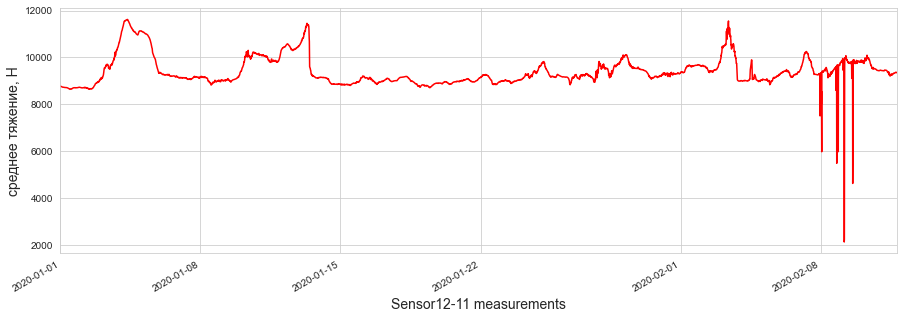

In [25]:
df1s['Fav_Sensor12-11'].plot(figsize = (15,5),grid=True,color='red')
plt.xlabel('Sensor12-11 measurements',fontsize=14)
plt.ylabel('среднее тяжение, Н',fontsize=14)
plt.show();

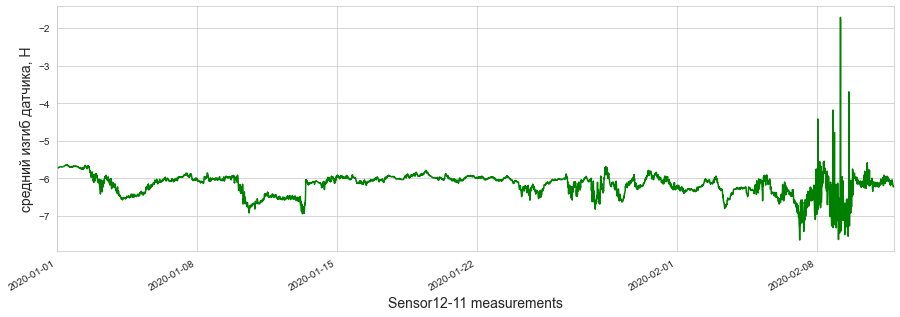

In [26]:
df1s['Fbend_Sensor12-11'].plot(figsize = (15,5),grid=True,color='green')
plt.xlabel('Sensor12-11 measurements',fontsize=14)
plt.ylabel('средний изгиб датчика, Н',fontsize=14)
plt.show();

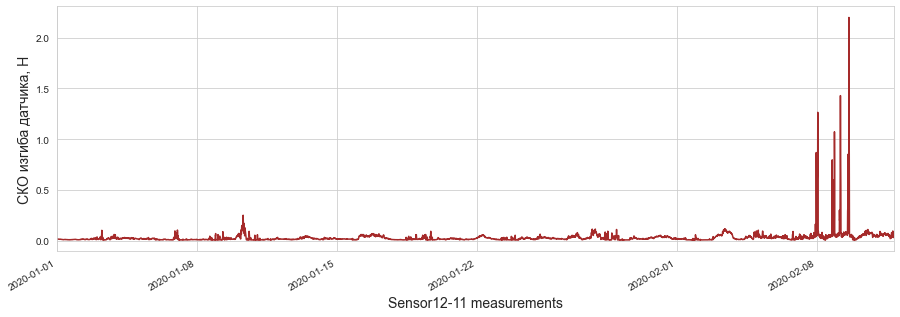

In [27]:
df1s['Fbend_std_Sensor12-11'].plot(figsize = (15,5),grid=True,color='brown')
plt.xlabel('Sensor12-11 measurements',fontsize=14)
plt.ylabel('СКО изгиба датчика, Н',fontsize=14)
plt.show();

Есть пик СКО изгиба датчика - возможно - сбой? 

#### Изучим подробнее этот выброс:

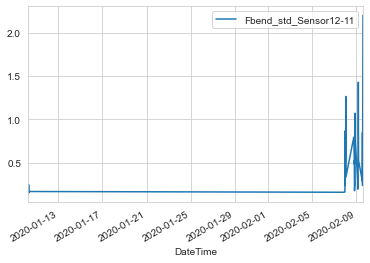

In [28]:
df1s.loc[df1s['Fbend_std_Sensor12-11'] > 0.15,['Fbend_std_Sensor12-11']].plot();

In [29]:
df1s.loc[df1s['Fbend_std_Sensor12-11'] > 0.15,['Fbend_std_Sensor12-11']]

Fbend_std_Sensor12-11
DateTime                                  
2020-01-10 06:50:00               0.151450
2020-01-10 07:20:00               0.155383
2020-01-10 07:30:00               0.160717
2020-01-10 07:50:00               0.249967
2020-01-10 08:00:00               0.171317
2020-01-10 08:30:00               0.159867
2020-01-10 08:40:00               0.171317
2020-02-07 22:10:00               0.162733
2020-02-07 23:00:00               0.170367
2020-02-07 23:10:00               0.868033
2020-02-07 23:20:00               0.245100
2020-02-08 00:40:00               0.605217
2020-02-08 00:50:00               0.667767
2020-02-08 01:00:00               1.264717
2020-02-08 01:10:00               0.336067
2020-02-08 18:20:00               0.795867
2020-02-08 19:10:00               0.598533
2020-02-08 19:20:00               0.486850
2020-02-08 19:30:00               0.524133
2020-02-08 19:50:00               0.180783
2020-02-08 20:50:00               0.248050
2020-02-08 21:00:00               1.072500
2020-02-08 21:10:00               0.769667
2020-02-09 03:00:00               0.299583
2020-02-09 03:10:00               0.198317
2020-02-09 03:20:00               0.213083
2020-02-09 03:50:00               0.483983
2020-02-09 04:00:00               0.658283
2020-02-09 04:10:00               1.429300
2020-02-09 04:20:00               0.860683
2020-02-09 04:30:00               0.744350
2020-02-09 04:40:00               0.529967
2020-02-09 12:50:00               0.292317
2020-02-09 13:00:00               0.320333
2020-02-09 13:10:00               0.850300
2020-02-09 13:20:00               0.240917
2020-02-09 14:20:00               2.199933

### _А что в оригинальном датасете c Fbend_std в этот период?_

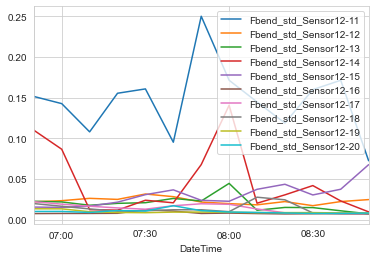

In [30]:
df.loc['2020-01-10 06:50:00':'2020-01-10 08:55:00', df.columns.str.startswith('Fbend_std')].plot();

На датчиках 11, 14 и 20 зарегистрированы пики Fbend_std в период 7:45 - 8:00 10 января.

__Возможно, был сильный порыв ветра?__

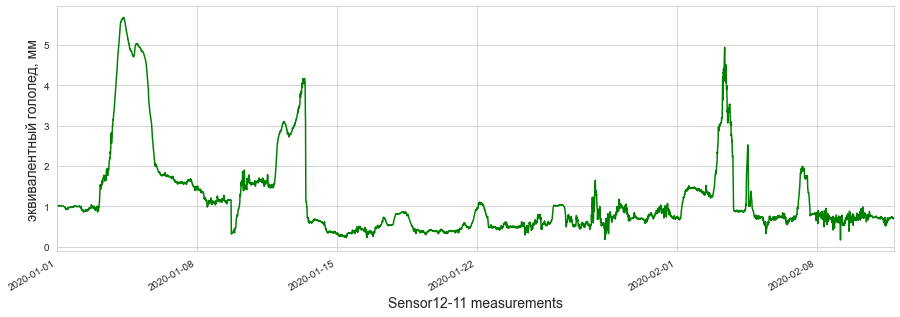

In [31]:
df1s['Ice_Sensor12-11'].plot(figsize = (15,5),grid=True,color='green')
plt.xlabel('Sensor12-11 measurements',fontsize=14)
plt.ylabel('эквивалентный гололед, мм',fontsize=14)
plt.show();


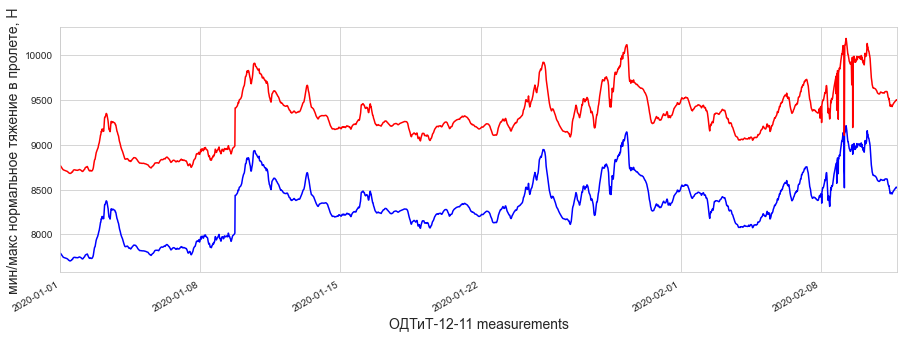

In [32]:
df1s['Fnorm_min_Sensor12-11'].plot(figsize = (15,5),grid=True,color='blue')
df1s['Fnorm_max_Sensor12-11'].plot(figsize = (15,5),grid=True,color='red')
plt.xlabel('ОДТиТ-12-11 measurements',fontsize=14)
plt.ylabel('мин/макс нормальное тяжение в пролете, Н',fontsize=14)
plt.show();

## 3. Кластеризация и поиск аномалий <a class='anchor' id='clusters'></a>

*Интересный момент*  

Есть запись, где больше 100 измерений. Погрешность?

In [33]:
df1s['N_Sensor12-11'].describe()

count    6000.000000
mean      100.000842
std         0.003650
min       100.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.016667
Name: N_Sensor12-11, dtype: float64

In [34]:
df1s[df1s['N_Sensor12-11'] > 100]

N_Sensor12-11  T_Sensor12-11  T_std_Sensor12-11  \
DateTime                                                               
2020-01-01 01:50:00     100.016667      -1.852817           0.006933   
2020-01-01 05:00:00     100.016667      -1.370167           0.007100   
2020-01-01 08:10:00     100.016667      -1.177500           0.006350   
2020-01-01 11:20:00     100.016667      -0.758267           0.006767   
2020-01-01 14:30:00     100.016667      -1.019917           0.006217   
...                            ...            ...                ...   
2020-02-11 04:40:00     100.016667      -9.592367           0.010650   
2020-02-11 08:00:00     100.016667      -9.358150           0.009700   
2020-02-11 11:30:00     100.016667      -6.634317           0.008750   
2020-02-11 14:50:00     100.016667      -7.078483           0.008583   
2020-02-11 18:20:00     100.016667      -7.970833           0.014350   

                     Fav_Sensor12-11  Fav_std_Sensor12-11  Fbend_Sensor12-11  \
DateTime                                                                       
2020-01-01 01:50:00      8751.192483            15.257517          -5.710600   
2020-01-01 05:00:00      8721.993883            14.431883          -5.691500   
2020-01-01 08:10:00      8708.266567            12.846167          -5.686650   
2020-01-01 11:20:00      8648.023433            13.570650          -5.640450   
2020-01-01 14:30:00      8678.438700            13.648983          -5.666367   
...                              ...                  ...                ...   
2020-02-11 04:40:00      9458.004283            20.995417          -6.065850   
2020-02-11 08:00:00      9381.444933            20.351217          -6.156983   
2020-02-11 11:30:00      9251.114517            20.244000          -5.990417   
2020-02-11 14:50:00      9312.052850            17.646617          -6.035433   
2020-02-11 18:20:00      9368.900017            26.266933          -6.116150   

                     Fbend_std_Sensor12-11  Ice_Sensor12-11  \
DateTime                                                      
2020-01-01 01:50:00               0.015400         1.017883   
2020-01-01 05:00:00               0.012650         1.013383   
2020-01-01 08:10:00               0.008917         1.007417   
2020-01-01 11:20:00               0.009450         0.934400   
2020-01-01 14:30:00               0.009117         0.965833   
...                                    ...              ...   
2020-02-11 04:40:00               0.063450         0.737417   
2020-02-11 08:00:00               0.064367         0.608683   
2020-02-11 11:30:00               0.063017         0.640567   
2020-02-11 14:50:00               0.045783         0.715967   
2020-02-11 18:20:00               0.035050         0.734300   

                     Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  \
DateTime                                                          
2020-01-01 01:50:00             0.029500            7764.097917   
2020-01-01 05:00:00             0.027850            7737.235700   
2020-01-01 08:10:00             0.024817            7726.524750   
2020-01-01 11:20:00             0.026267            7703.271317   
2020-01-01 14:30:00             0.026433            7717.790583   
...                                  ...                    ...   
2020-02-11 04:40:00             0.041350            8612.617700   
2020-02-11 08:00:00             0.040500            8599.723400   
2020-02-11 11:30:00             0.040350            8453.467900   
2020-02-11 14:50:00             0.034867            8476.968267   
2020-02-11 18:20:00             0.051433            8525.389400   

                     Fnorm_max_Sensor12-11  
DateTime                                    
2020-01-01 01:50:00            8741.334933  
2020-01-01 05:00:00            8714.449033  
2020-01-01 08:10:00            8703.765017  
2020-01-01 11:20:00            8680.440717  
2020-01-01 14:30:00            8695.040367  
...                                 

Имеем 804 таких записи. Можем ли округлить до 100 ?

Для дальнейшего анализа отбросим этот столбец.

In [35]:
df1s_upd = df1s.drop('N_Sensor12-11', axis=1)
df1s_upd.head()

T_Sensor12-11  T_std_Sensor12-11  Fav_Sensor12-11  \
DateTime                                                                 
2020-01-01 00:00:00      -2.292167           0.006583      8781.619650   
2020-01-01 00:10:00      -2.267683           0.007567      8775.583017   
2020-01-01 00:20:00      -2.238517           0.006250      8772.642833   
2020-01-01 00:30:00      -2.204450           0.006767      8772.006050   
2020-01-01 00:40:00      -2.161767           0.006433      8768.819700   

                     Fav_std_Sensor12-11  Fbend_Sensor12-11  \
DateTime                                                      
2020-01-01 00:00:00            15.540450          -5.726400   
2020-01-01 00:10:00            16.167100          -5.721750   
2020-01-01 00:20:00            14.954567          -5.723217   
2020-01-01 00:30:00            14.743733          -5.722717   
2020-01-01 00:40:00            15.115983          -5.717350   

                     Fbend_std_Sensor12-11  Ice_Sensor12-11  \
DateTime                                                      
2020-01-01 00:00:00               0.015850         1.029383   
2020-01-01 00:10:00               0.015800         1.020233   
2020-01-01 00:20:00               0.015883         1.017650   
2020-01-01 00:30:00               0.013733         1.020133   
2020-01-01 00:40:00               0.014950         1.018617   

                     Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  \
DateTime                                                          
2020-01-01 00:00:00             0.030083            7788.526550   
2020-01-01 00:10:00             0.031200            7787.369067   
2020-01-01 00:20:00             0.029050            7785.530467   
2020-01-01 00:30:00             0.028517            7783.651267   
2020-01-01 00:40:00             0.029283            7781.330650   

                     Fnorm_max_Sensor12-11  
DateTime                                    
2020-01-01 00:00:00            8765.850283  
2020-01-01 00:10:00            8764.505317  
2020-01-01 00:20:00            8763.113867  
2020-01-01 00:30:00            8760.915767  
2020-01-01 00:40:00            8758.728000

Отлично.

---

Возвращаемся к анализу.  
Создадим random state.

In [36]:
SEED = 42

### 3.1 Классификация тремя кластерами <a class='anchor' id='triple'></a>

Построим самую простую модельку KMeans с тремя центроидами и посмотрим на данные на графике PairPlot.

In [37]:
model = KMeans(n_clusters=3, random_state=SEED).fit(df1s_upd)

Добавим лейблы кластеров к датасету

In [38]:
df1s_upd['label'] = model.labels_.astype(int)

Свернем функцию для дальнейшей работы.

In [117]:
def paiplot(df, model, c_labels):

    centroids = pd.DataFrame(model.cluster_centers_, columns=df.columns)
    centroids['label'] = c_labels

    data_all = pd.concat([df, centroids], ignore_index=True)

    sns_plot = sns.pairplot(data_all, hue='label', diag_kind='hist')
    sns_plot;

In [107]:
#c_labels = ['0 centroid', '1 centroid', '2 centroid']
#paiplot(df1s_upd)

Сохраним график в отдельный файл для удобства просмотра и анализа.

In [39]:
#sns_plot.savefig('pairplot_3_c.png')

В этой ячейке изображение графика.

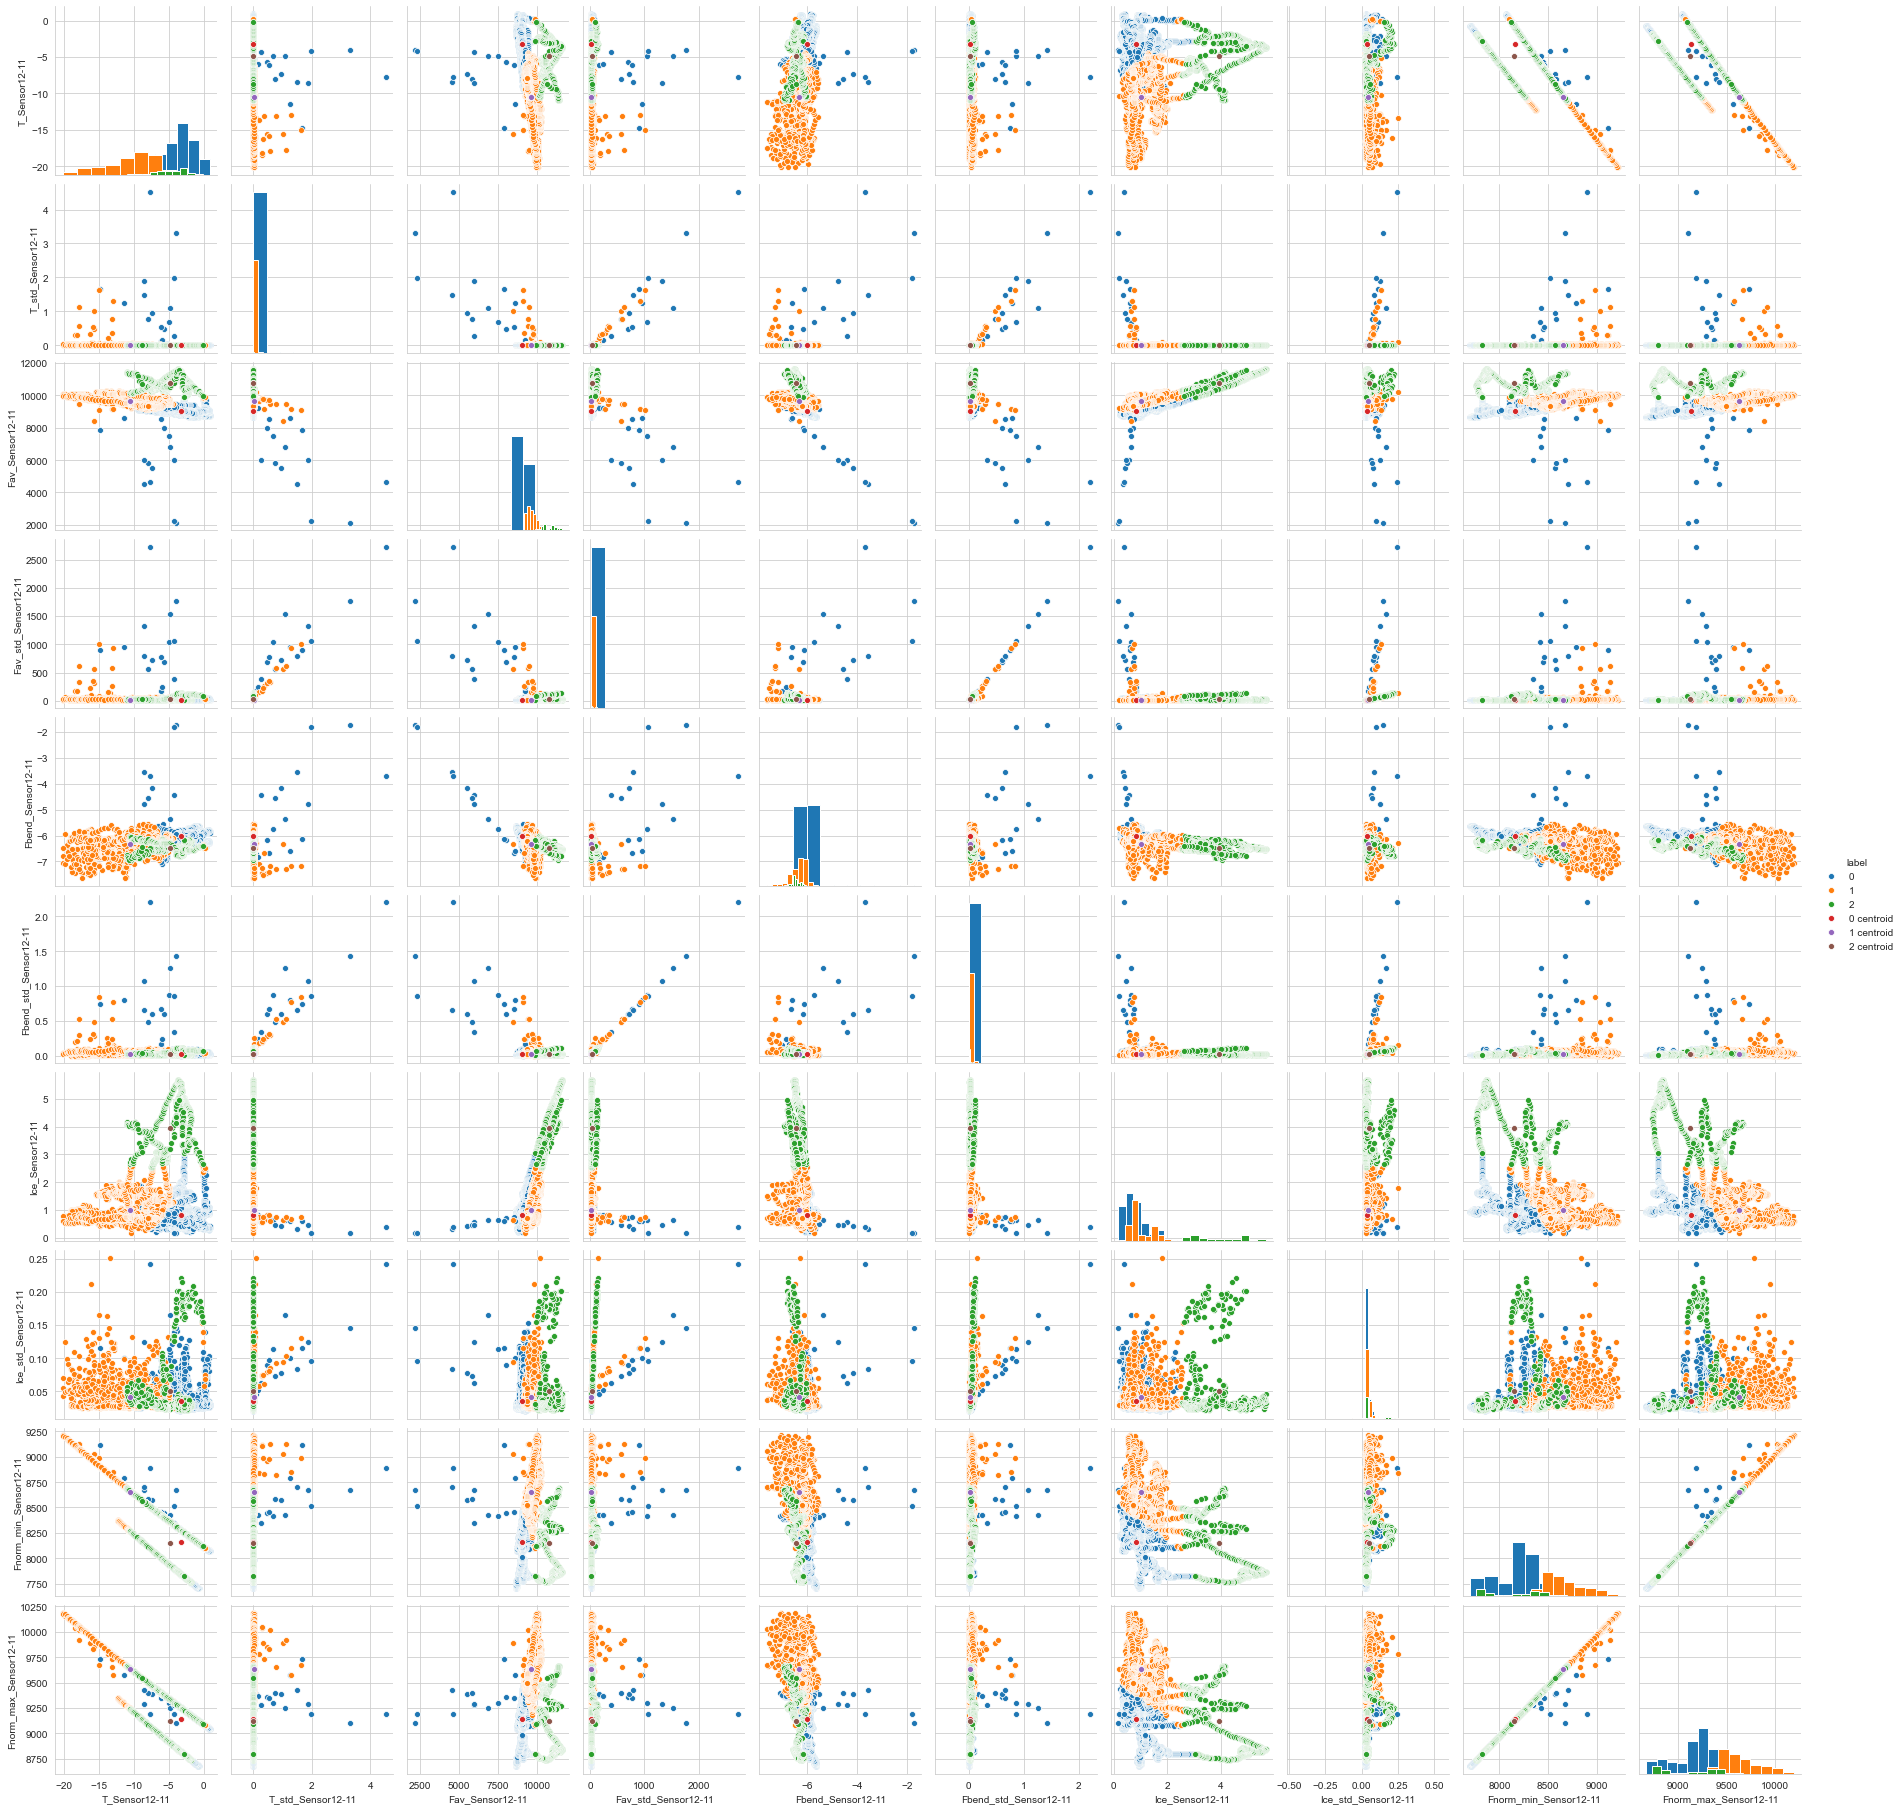

### <span style='color:green'>Вопрос решен</span> <a class='anchor' id='question'></a>   

Босс, насколько разумно нам делать классификацию неподготовленных данных? В чем смысл подхода, если в один кластер попадет информация, например, сегодня 16:00 и позавчера 23:00.   

По сути, сезонные колебания и разбивку по ним мы видим на графике временных рядов. Что нам даст кластеризация по разбитым временным отрезкам? Есть ли смысл вывести средние значения столбцов по каждому дню и кластеризировать уже их.  

---

Но сначала посмотрим на количество популяции кластеров.  
Напишем функцию автоматизации.

In [40]:
def cluster_pop(df):
    
    temp = df['label'].value_counts().reset_index()
    
    fig = go.Figure(data=[go.Pie(labels=temp['index'],
                             values=temp['label'])])
    
    fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                   marker=dict(line=dict(color='#000000', width=2)))
    
    fig.update_layout(title={'text': 'Популяция кластеров',
                        'y':0.88,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top',},
                     font={'size':18})
    
    fig.show()

In [41]:
cluster_pop(df1s_upd)

Нулевой кластер съел больше половины данных. Второй кластер занимает меньше 10%.

---

Посмотрим, как разбивка по кластерам распределилась по времени.   
Так же напишем функцию автоматизации. 

In [95]:
def scatter_date(df, column):
    
    plt.figure(figsize=(16,4))

    #sns.scatterplot(df.index, df['label'], alpha=1, hue=df['label'], palette='Dark2', s=100)
    plt.plot_date(df.index, df['label'], linestyle='None', marker='o', color='dimgray', markersize=5)

    plt.xlabel('Дата')
    plt.title('Распределение лейблов кластеризации в течение сезона', size=18, y=1.03)
    
 

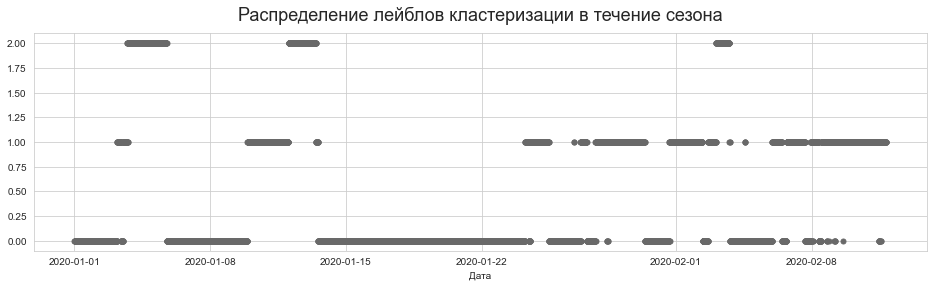

In [96]:
scatter_date(df1s_upd, 'label')

Жителей нулевого лейбла можно встретить на протяжении всего сезона. Обитатели кластера 1 проявляются ближе к весне. Второкластерники распрелеются пока не ясно как.

### 3.2 Поиск оптимального количества кластеров   <a class='anchor' id='optimal'></a>  

Проверим значение целевой функции на количестве кластеров в диапазоне от 1 до 12.  
Функция для автоматизации.

In [44]:
def cluster_optimization(df, name, max_range):

    ### Cобираем все значения целевой функции в списке distortion
    distortion = []
    K = range(1, max_range)
    for k in K:
        model = KMeans(n_clusters=k, random_state=SEED)
        model.fit(df)
        distortion.append(model.inertia_)
        
    ### Отрисовываем локтевой график  
    plt.figure(figsize=(12, 8))
    plt.plot(K, distortion, 'o-', linewidth=3, markersize=10, 
             markerfacecolor='whitesmoke', markeredgewidth=2, color='dimgray')
    
    plt.xlabel('Число кластеров', size=12)
    plt.ylabel('Значение целевой функции', size=12)
    plt.title('Подбор количества кластеров, датасет {}'.format(name), size=18, y=(1.02))

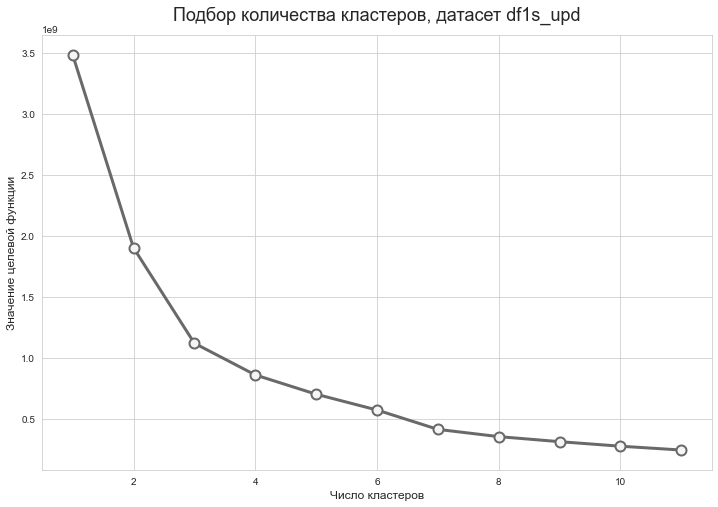

In [45]:
cluster_optimization(df1s_upd, 'df1s_upd', 12)

Первичный анализ показал, что 7 кластеров являются пока наилучшей отправной точкой для дальнейшего анализа.

---

### 3.3 Анализ 7 кластеров   <a class='anchor' id='seventh'></a>  

Cоздадим новую модель с семикластерной разбивкой. Создадим новый датасет df1s_upd_7 и присвоим каждому значению обновленные лейблы. Посмотрим на загруженность кластеров.

In [46]:
model_7 = KMeans(n_clusters=7, random_state=SEED).fit(df1s_upd)

df1s_upd_7 = df1s_upd.copy()

df1s_upd_7['label'] = model_7.labels_.astype('int')

cluster_pop(df1s_upd_7)

Интересно, что это за 9 записей в пятом кластере.

In [47]:
temp = df1s_upd_7.query('label == 5')
temp

T_Sensor12-11  T_std_Sensor12-11  Fav_Sensor12-11  \
DateTime                                                                 
2020-02-08 01:00:00      -4.840550           1.084000      6838.204317   
2020-02-08 01:10:00      -4.275167           0.264983      5982.267100   
2020-02-08 19:10:00      -7.385483           0.956467      5490.676000   
2020-02-08 19:20:00      -7.973667           0.761000      5820.999817   
2020-02-08 21:00:00      -8.553533           1.879300      5986.120267   
2020-02-09 04:00:00      -8.483883           1.481633      4523.775850   
2020-02-09 04:10:00      -3.996033           3.301150      2138.157433   
2020-02-09 04:20:00      -4.238400           1.985733      2260.629417   
2020-02-09 14:20:00      -7.715067           4.528317      4632.692317   

                     Fav_std_Sensor12-11  Fbend_Sensor12-11  \
DateTime                                                      
2020-02-08 01:00:00          1535.837350          -5.379867   
2020-02-08 01:10:00           378.776633          -4.419467   
2020-02-08 19:10:00           717.310600          -4.180267   
2020-02-08 19:20:00           566.356733          -4.560450   
2020-02-08 21:00:00          1322.108183          -4.776683   
2020-02-09 04:00:00           799.687500          -3.565700   
2020-02-09 04:10:00          1767.769500          -1.719617   
2020-02-09 04:20:00          1062.489617          -1.805383   
2020-02-09 14:20:00          2723.970417          -3.696667   

                     Fbend_std_Sensor12-11  Ice_Sensor12-11  \
DateTime                                                      
2020-02-08 01:00:00               1.264717         0.632450   
2020-02-08 01:10:00               0.336067         0.576017   
2020-02-08 19:10:00               0.598533         0.416583   
2020-02-08 19:20:00               0.486850         0.472850   
2020-02-08 21:00:00               1.072500         0.458583   
2020-02-09 04:00:00               0.658283         0.328217   
2020-02-09 04:10:00               1.429300         0.169550   
2020-02-09 04:20:00               0.860683         0.184767   
2020-02-09 14:20:00               2.199933         0.385417   

                     Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  \
DateTime                                                          
2020-02-08 01:00:00             0.165083            8424.693650   
2020-02-08 01:10:00             0.062650            8347.518067   
2020-02-08 19:10:00             0.077717            8569.735100   
2020-02-08 19:20:00             0.072833            8580.502883   
2020-02-08 21:00:00             0.124217            8676.722017   
2020-02-09 04:00:00             0.084550            8703.614350   
2020-02-09 04:10:00             0.145600            8669.473550   
2020-02-09 04:20:00             0.096183            8519.305817   
2020-02-09 14:20:00             0.241383            8893.926433   

                     Fnorm_max_Sensor12-11  label  
DateTime                                           
2020-02-08 01:00:00            9248.077067      5  
2020-02-08 01:10:00            9284.712733      5  
2020-02-08 19:10:00            9386.095650      5  
2020-02-08 19:20:00            9393.679950      5  
2020-02-08 21:00:00            9285.306333      5  
2020-02-09 04:00:00            9426.415733      5  
2020-02-09 04:10:00            9106.266583      5  
2020-02-09 04:20:00            9191.121200      5  
2020-02-09 14:20:00            9192.393433      5

In [48]:
temp.describe()

T_Sensor12-11  T_std_Sensor12-11  Fav_Sensor12-11  Fav_std_Sensor12-11  \
count       9.000000           9.000000         9.000000             9.000000   
mean       -6.384643           1.804731      4852.613613          1208.256281   
std         1.985999           1.346250      1661.760148           729.725252   
min        -8.553533           0.264983      2138.157433           378.776633   
25%        -7.973667           0.956467      4523.775850           717.310600   
50%        -7.385483           1.481633      5490.676000          1062.489617   
75%        -4.275167           1.985733      5982.267100          1535.837350   
max        -3.996033           4.528317      6838.204317          2723.970417   

       Fbend_Sensor12-11  Fbend_std_Sensor12-11  Ice_Sensor12-11  \
count           9.000000               9.000000         9.000000   
mean           -3.789344               0.989652         0.402715   
std             1.271198               0.580947         0.157623   
min            -5.379867               0.336067         0.169550   
25%            -4.560450               0.598533         0.328217   
50%            -4.180267               0.860683         0.416583   
75%            -3.565700               1.264717         0.472850   
max            -1.719617               2.199933         0.632450   

       Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  Fnorm_max_Sensor12-11  \
count             9.000000               9.000000               9.000000   
mean              0.118913            8598.387985            9279.340965   
std               0.057613             162.059107             107.494284   
min               0.062650            8347.518067            9106.266583   
25%               0.077717            8519.305817            9192.393433   
50%               0.096183            8580.502883            9284.712733   
75%               0.145600            8676.722017            9386.095650   
max               0.241383            8893.926433            9426.415733   

       label  
count    9.0  
mean     5.0  
std      0.0  
min      5.0  
25%      5.0  
50%      5.0  
75%      5.0  
max      5.0

In [49]:
df1s_upd_7.describe()

T_Sensor12-11  T_std_Sensor12-11  Fav_Sensor12-11  Fav_std_Sensor12-11  \
count    6000.000000        6000.000000      6000.000000          6000.000000   
mean       -5.811072           0.013423      9407.572993            24.057464   
std         4.270418           0.097638       613.875484            64.444635   
min       -20.155150           0.005400      2138.157433            11.323317   
25%        -8.154975           0.006867      9013.689625            14.432846   
50%        -4.824542           0.007617      9225.897450            16.481900   
75%        -2.682979           0.008550      9642.631412            21.820458   
max         0.916367           4.528317     11618.491683          2723.970417   

       Fbend_Sensor12-11  Fbend_std_Sensor12-11  Ice_Sensor12-11  \
count        6000.000000            6000.000000      6000.000000   
mean           -6.168562               0.028276         1.182860   
std             0.294913               0.055591         1.050249   
min            -7.634767               0.005750         0.169550   
25%            -6.318642               0.011200         0.582579   
50%            -6.092867               0.017942         0.797008   
75%            -5.991237               0.034054         1.400650   
max            -1.719617               2.199933         5.678267   

       Ice_std_Sensor12-11  Fnorm_min_Sensor12-11  Fnorm_max_Sensor12-11  \
count          6000.000000            6000.000000            6000.000000   
mean              0.039492            8324.718377            9300.670126   
std               0.023026             316.797977             315.379378   
min               0.020783            7701.045183            8678.178667   
25%               0.027650            8147.599271            9124.646433   
50%               0.031600            8312.748317            9289.541100   
75%               0.041750            8511.254967            9486.422704   
max               0.251850            9212.978417           10187.804400   

             label  
count  6000.000000  
mean      2.090000  
std       2.062428  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       6.000000

Заметна сильная разница в тяжении: 4-5к H в кластере и 9к Н в среднем в датасете. Сильной наледи не зафиксировано (0,1 мм). Продолжительность от 10 до 30 минут.  

Выдвину гипотезу о штормовых порывах ветра. Возможно, в дальнейшем, нам пригодится информация из этого кластера.

---

**Константин, требуется помощь зала**  
Я скажу простыми словыми, тапками не кидайтесь =) Залез в интернет и почитал несколько статей. Правильно ли я понял, что при натяжении провода, например, от порыва ветра, среднее тяжение УМЕНЬШАЕТСЯ.  
Как в случае выше.     

И где можно об этом почитать +- доступным языком. ВУЗовские учебники не предлагать, я не настолько сильный физик =)

---

## Анализ трех столбцов: температура, тяжение, СКО датчика <a class='anchor' id='triple_analysys'></a>  

Обновляем датасет для исследования.

In [50]:
df_triple = df1s[['T_Sensor12-11','Fav_Sensor12-11','Fbend_std_Sensor12-11']]
df_triple

T_Sensor12-11  Fav_Sensor12-11  Fbend_std_Sensor12-11
DateTime                                                                  
2020-01-01 00:00:00      -2.292167      8781.619650               0.015850
2020-01-01 00:10:00      -2.267683      8775.583017               0.015800
2020-01-01 00:20:00      -2.238517      8772.642833               0.015883
2020-01-01 00:30:00      -2.204450      8772.006050               0.013733
2020-01-01 00:40:00      -2.161767      8768.819700               0.014950
...                            ...              ...                    ...
2020-02-11 19:10:00      -7.937667      9346.201250               0.051217
2020-02-11 19:20:00      -7.873483      9347.595050               0.034050
2020-02-11 19:30:00      -7.851517      9350.272000               0.036267
2020-02-11 19:40:00      -7.864100      9352.142200               0.032733
2020-02-11 19:50:00      -7.892550      9355.759967               0.029750

[6000 rows x 3 columns]

Посмотрим на корреляции между признаками.

In [51]:
def heatmap(df):

    corr = df.corr()

    plt.figure(figsize=(8,8))

    sns.heatmap(corr, center=0, annot=True, cmap='Greys',
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.yticks(rotation=0, size=11) 
    plt.xticks(size=11) 
    plt.title('Корреляция выбранных данных', size=18, y=(1.05));

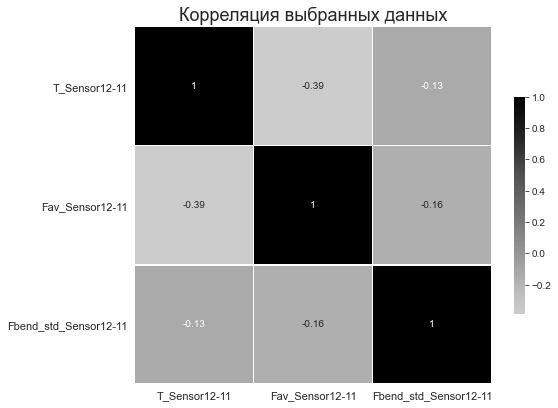

In [52]:
heatmap(df_triple)

Заметна отрицательная корреляция между средним тяжением и температурой.

---

Подберем оптимальное количество кластеров методом локтя.

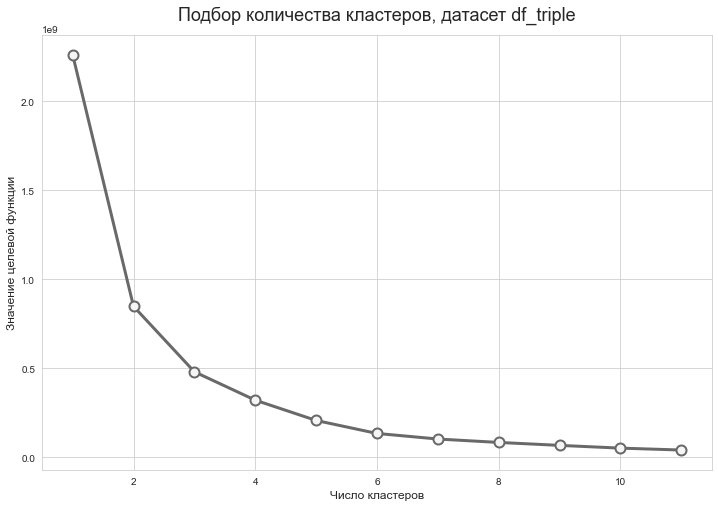

In [53]:
cluster_optimization(df_triple, 'df_triple', 12)

За оптимальный результат примем значение 6 кластеров.

In [54]:
model_triple = KMeans(n_clusters=6, random_state=SEED).fit(df_triple)

df_triple['label'] = model_triple.labels_.astype('int')

cluster_pop(df_triple)

Снова наткнулись на кластер из 7 значений. Сверхсильные порывы ветра?

In [55]:
df_triple.query('label == 5')

T_Sensor12-11  Fav_Sensor12-11  Fbend_std_Sensor12-11  \
DateTime                                                                     
2020-02-08 01:10:00      -4.275167      5982.267100               0.336067   
2020-02-08 19:10:00      -7.385483      5490.676000               0.598533   
2020-02-08 19:20:00      -7.973667      5820.999817               0.486850   
2020-02-08 21:00:00      -8.553533      5986.120267               1.072500   
2020-02-09 04:00:00      -8.483883      4523.775850               0.658283   
2020-02-09 04:10:00      -3.996033      2138.157433               1.429300   
2020-02-09 04:20:00      -4.238400      2260.629417               0.860683   
2020-02-09 14:20:00      -7.715067      4632.692317               2.199933   

                     label  
DateTime                    
2020-02-08 01:10:00      5  
2020-02-08 19:10:00      5  
2020-02-08 19:20:00      5  
2020-02-08 21:00:00      5  
2020-02-09 04:00:00      5  
2020-02-09 04:10:00      5  
2020-02-09 04:20:00      5  
2020-02-09 14:20:00      5

Да, те же самые значения. Но дата **2020-02-08 01:00:00** не попала в обновленный кластер.

In [56]:
df_triple.query('DateTime=="2020-02-08 01:00:00"')

T_Sensor12-11  Fav_Sensor12-11  Fbend_std_Sensor12-11  \
DateTime                                                                     
2020-02-08 01:00:00       -4.84055      6838.204317               1.264717   

                     label  
DateTime                    
2020-02-08 01:00:00      2

Теперь эта запись в кластере номер 2, втором по величине.

---

Посмотрим на распределение лейблов в течение сезона.

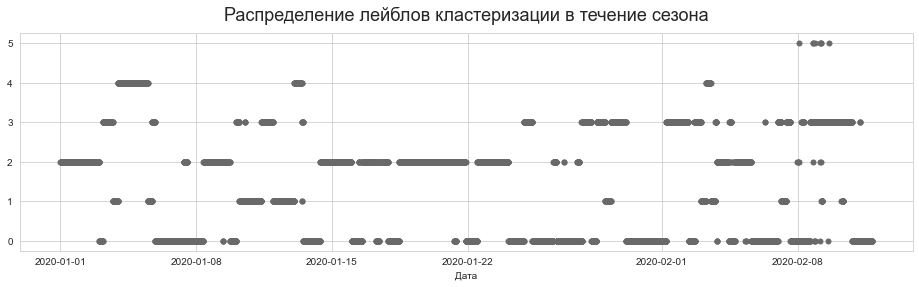

In [97]:
scatter_date(df_triple, 'label')

Интересная была неделька с 14 по 24 января. Преобладает второй кластер. Интересно, что происходило.

In [103]:
c2 = df_triple.query('DateTime>20200114 & DateTime<=20200124 & label==2') 
c2

T_Sensor12-11  Fav_Sensor12-11  Fbend_std_Sensor12-11  \
DateTime                                                                     
2020-01-14 08:50:00      -4.139133      9074.443967               0.024267   
2020-01-14 09:40:00      -3.691117      9064.614183               0.022800   
2020-01-14 09:50:00      -3.622133      9041.244850               0.021167   
2020-01-14 10:00:00      -3.529933      9028.438983               0.019717   
2020-01-14 10:10:00      -3.430733      9016.931167               0.018317   
...                            ...              ...                    ...   
2020-01-23 23:20:00      -4.150200      9048.336350               0.006717   
2020-01-23 23:30:00      -4.187467      9048.548100               0.007383   
2020-01-23 23:40:00      -4.217467      9048.496817               0.006800   
2020-01-23 23:50:00      -4.256017      9055.139233               0.006967   
2020-01-24 00:00:00      -4.291500      9049.897800               0.009033   

                     label  
DateTime                    
2020-01-14 08:50:00      2  
2020-01-14 09:40:00      2  
2020-01-14 09:50:00      2  
2020-01-14 10:00:00      2  
2020-01-14 10:10:00      2  
...                    ...  
2020-01-23 23:20:00      2  
2020-01-23 23:30:00      2  
2020-01-23 23:40:00      2  
2020-01-23 23:50:00      2  
2020-01-24 00:00:00      2  

[1108 rows x 4 columns]

Посмотрим на pairgrid.

centroids = pd.DataFrame(model_triple.cluster_centers_, columns=df_triple.columns[:-1])
centroids['label'] = c_labels

data_all = pd.concat([df_triple, centroids], ignore_index=True)


sns_plot = sns.pairplot(data_all, hue='label', diag_kind='hist', palette='muted')
sns_plot
sns_plot.fig.set_size_inches(10,10);

Не слишком информативно. Обратимся к plotly.  

#### Первый график более наглядный, но закоменнтированный.

fig = px.scatter_matrix(df_triple,
    dimensions=['T_Sensor12-11', 'Fav_Sensor12-11', 'Fbend_std_Sensor12-11'],
    color='label')
fig.update_traces(diagonal_visible=False)
fig.show()

In [153]:
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Температура, *C', values=df_triple['T_Sensor12-11']),
                              dict(label='Среднее тяжение, Н', values=df_triple['Fav_Sensor12-11']),
                              dict(label='СКО сенсора', values=df_triple['Fbend_std_Sensor12-11'])],
                  marker=dict(color=df_triple['label'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=df_triple['label'],
                  diagonal=dict(visible=False)))

title = 'Scattermatrix признаков df_triple'
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show()

Можно увеличивать и растягивать график. Выбирать определенные значения.